In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
SEED = 42

In [3]:
np.random.seed(SEED)

In [4]:
def bootstrap_data(df):
    
    bootstrap = df[df['label'] == 'copy']

    # Generate a random number between 0.1 and 0.3
    random_num = np.random.uniform(0.05, 0.1)

    # Generate a random sign (1 for addition, -1 for subtraction)
    random_sign = np.random.choice([-1, 1])

    # Add or subtract the random number to the 'unigrams' and 'bigrams' columns
    bootstrap.loc[:, ['unigrams','bigrams']] += random_num * random_sign
    
    df = pd.concat([df, bootstrap], axis=0)
    
    return df

In [5]:
df = pd.read_csv('train.csv')

# Dropping unnecesary columns
df.drop(['base','compare'], axis=1, inplace=True)

# Evening labels to not have an impaired dataset
df = df[(df['bigrams'] != 0) & (df['unigrams'] > 0.18)]

# Creating more "copy" labels 
df = bootstrap_data(df)
df = bootstrap_data(df)

In [6]:
df.label.value_counts()

label
original    383
copy        240
Name: count, dtype: int64

In [19]:
# Split dataset in features and target variable
feature_cols = ['unigrams', 'bigrams']

X = df[feature_cols] # Features
y = df.label # Target variable

In [8]:
# Split X and y into training and testing sets 80 and 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)

In [9]:
# TODO:
# Grid Search to fine best hyperparameters

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')

True Negatives: 45
False Negatives: 3
True Positives: 71
False Positives: 6


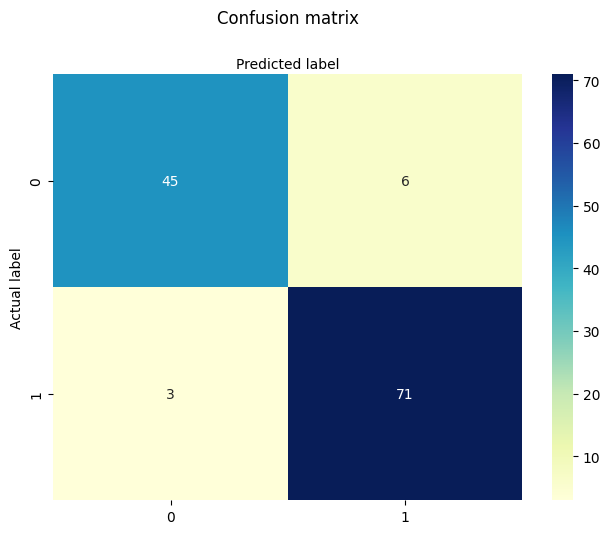

In [11]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [12]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc}')

AUC: 0.9369369369369368


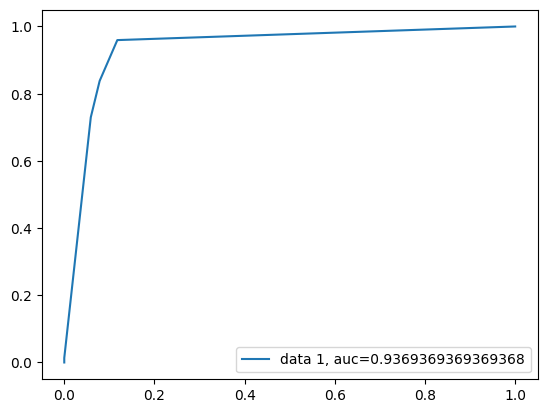

In [13]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='original')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [14]:
target_names = ['copy', 'original']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        copy       0.94      0.88      0.91        51
    original       0.92      0.96      0.94        74

    accuracy                           0.93       125
   macro avg       0.93      0.92      0.92       125
weighted avg       0.93      0.93      0.93       125



In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.928


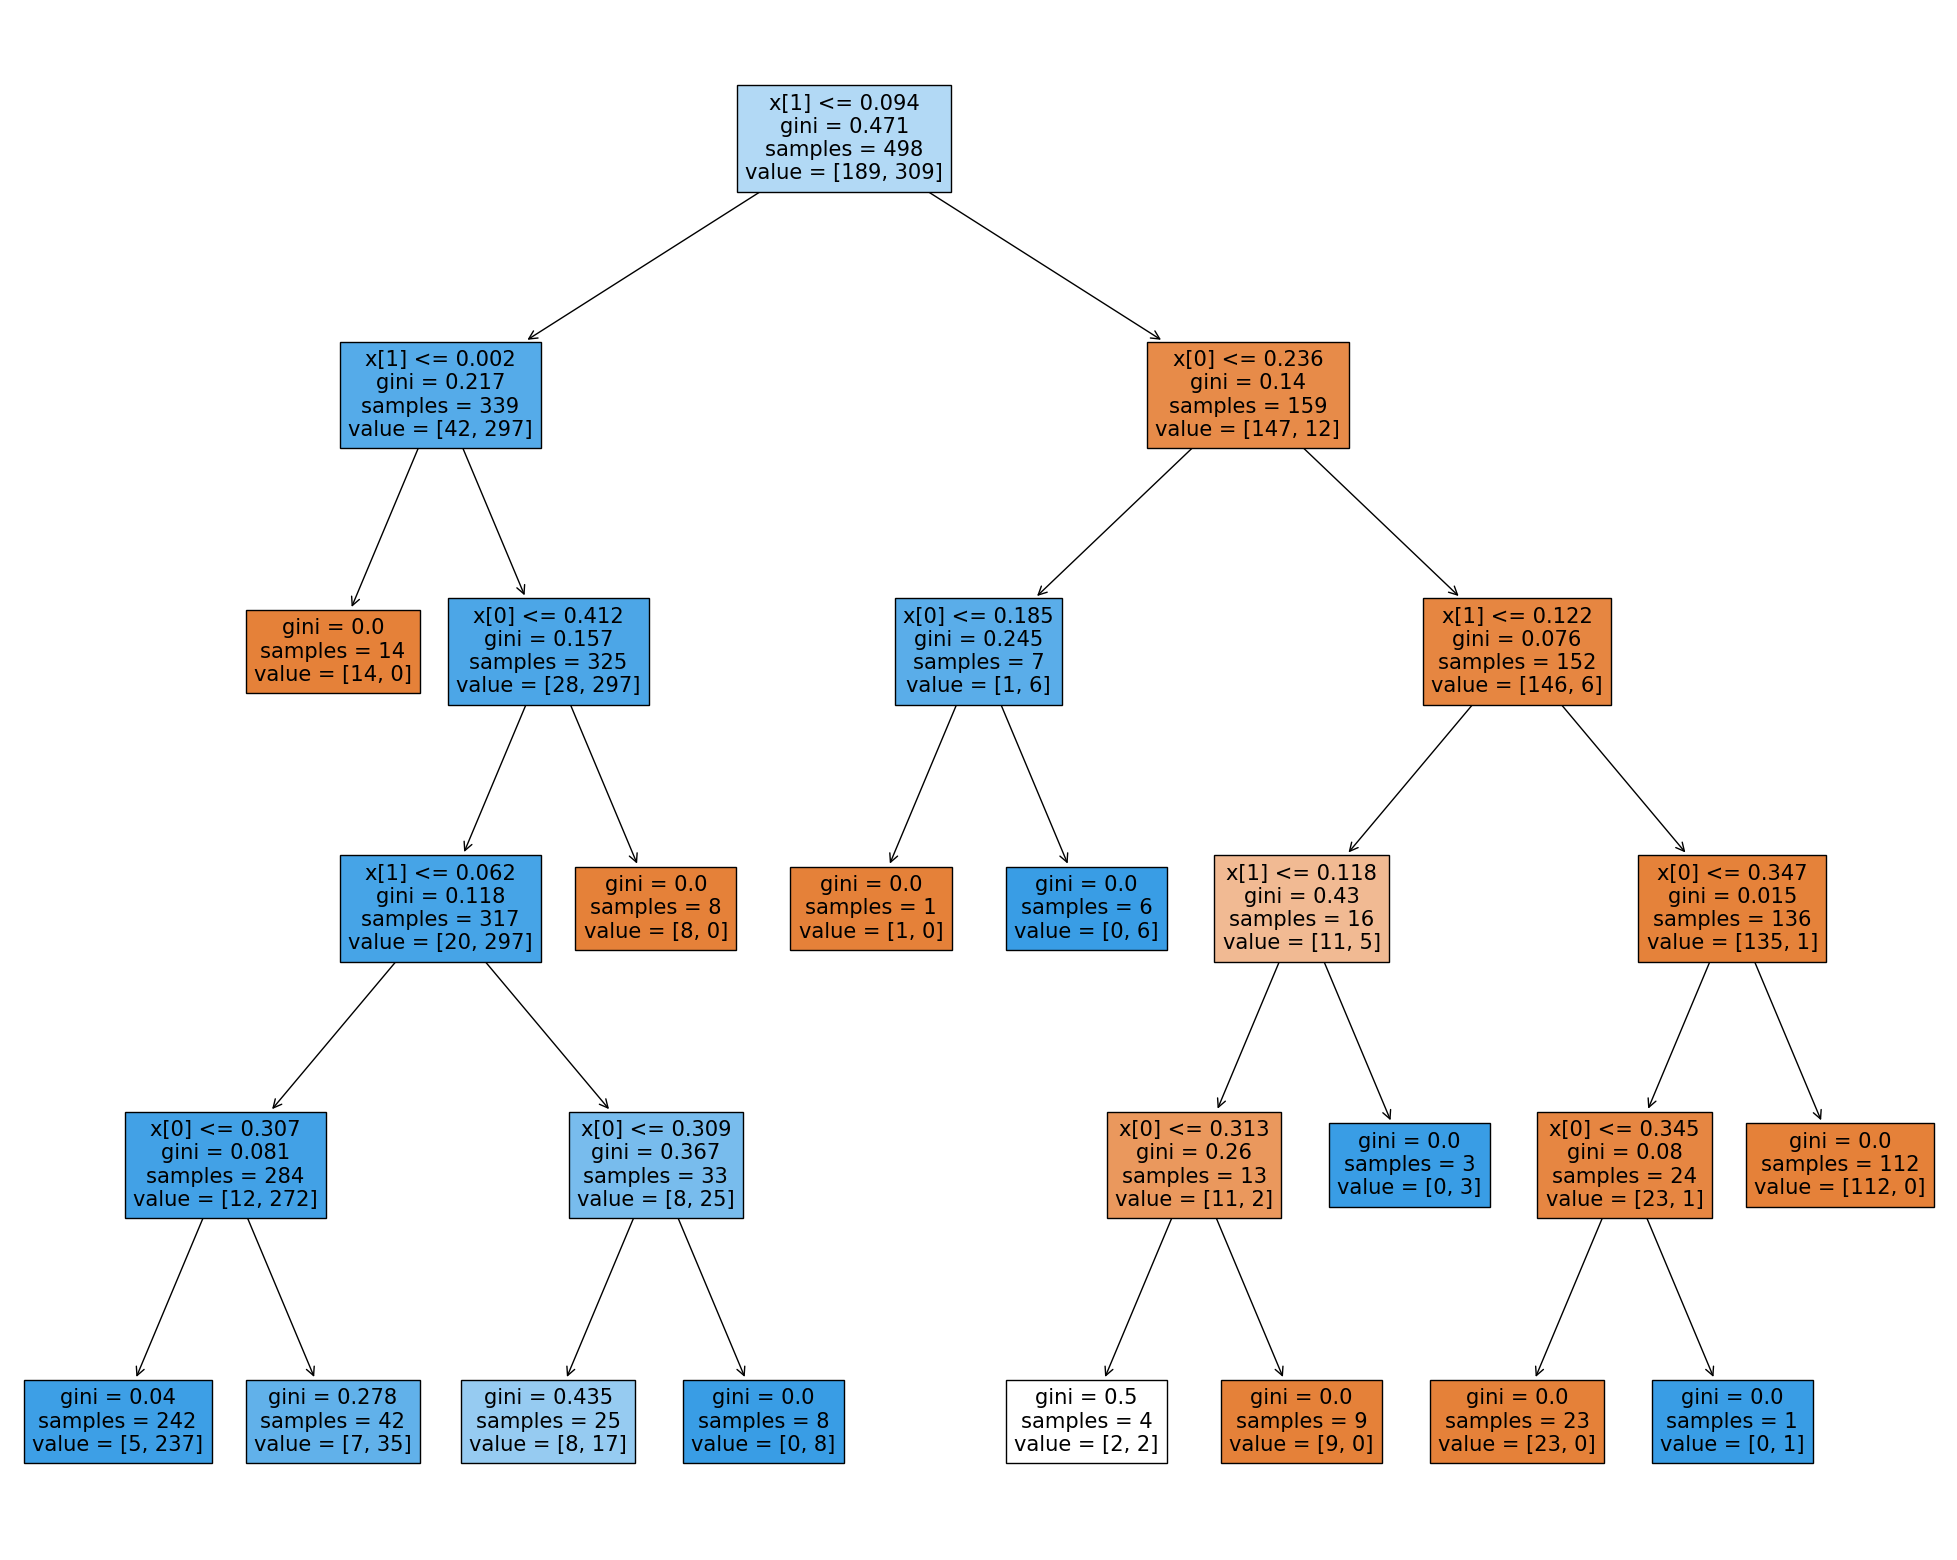

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

# Model Persistence

In [17]:
import pickle

In [18]:
with open('model.pkl','wb') as f:
    pickle.dump(clf, f)